<a href="https://colab.research.google.com/github/sachinthadilshann/UdemyMLProjects/blob/main/Medical_insurance_premium_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [185]:
df = pd.read_csv('https://raw.githubusercontent.com/sachinthadilshann/UdemyMLProjects/refs/heads/main/insurance.csv')

In [186]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [188]:
df.shape

(1338, 7)

In [189]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [190]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [191]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [192]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [193]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [194]:
df = pd.get_dummies(df, drop_first=True)

In [195]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [196]:
df['sex_male'] = df['sex_male'].astype(int)
df['smoker_yes'] = df['smoker_yes'].astype(int)
df['region_northwest'] = df['region_northwest'].astype(int)
df['region_southeast'] = df['region_southeast'].astype(int)
df['region_southwest'] = df['region_southwest'].astype(int)

In [197]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [198]:
df1 = df.drop(columns='charges')

<Axes: >

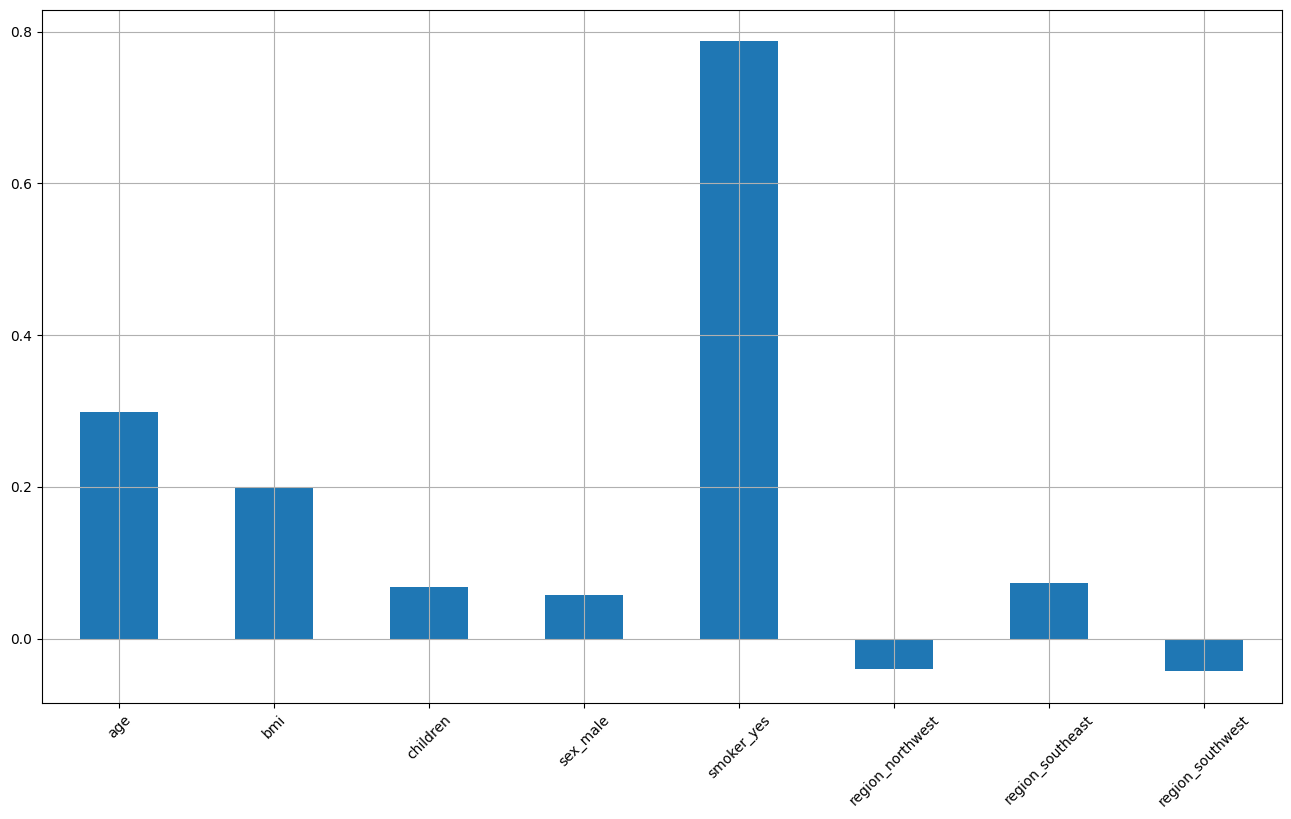

In [199]:
df1.corrwith(df['charges']).plot.bar(figsize=(16,9),rot=45,grid= True)

In [200]:
corr = df.corr()

<Axes: >

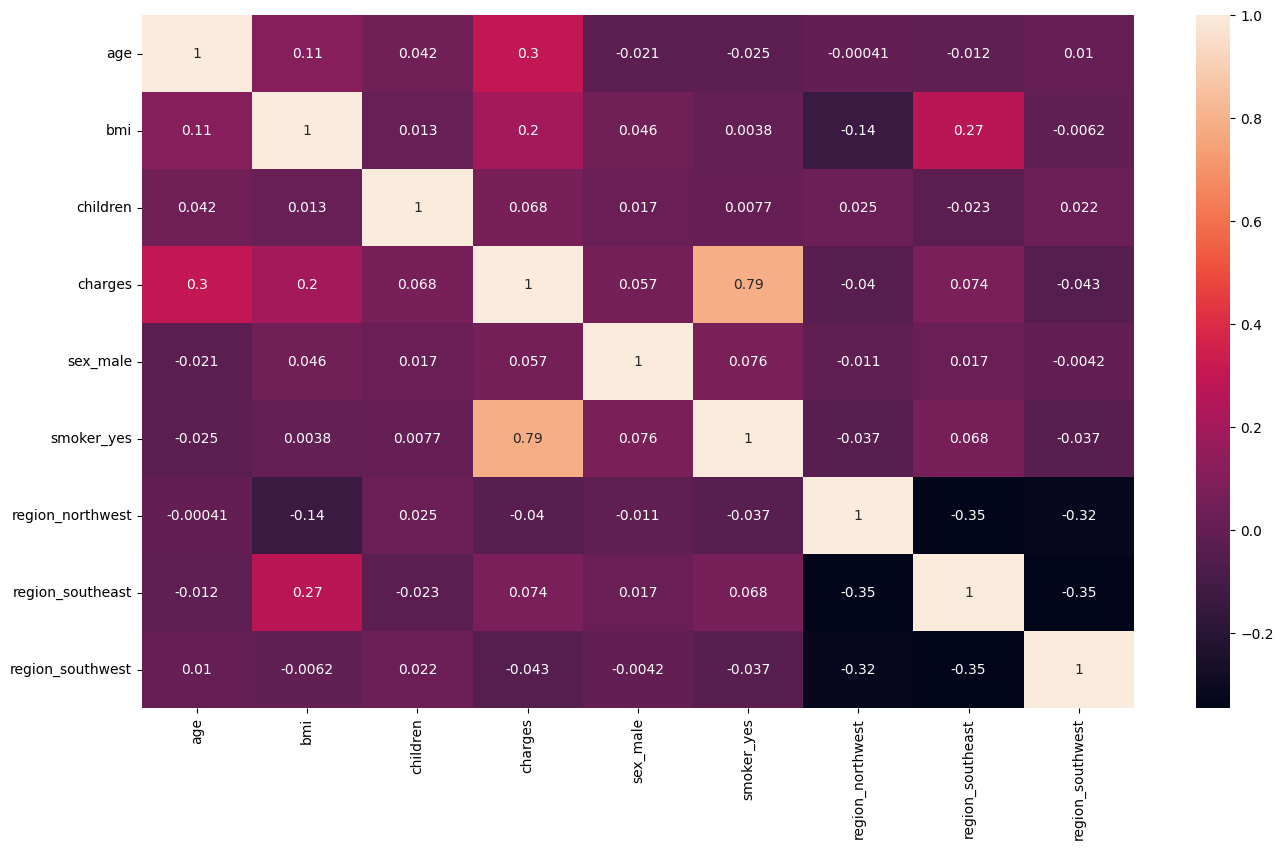

In [201]:
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True)

In [202]:
x = df.drop(columns='charges')

In [203]:
y = df['charges']

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [206]:
x_train.shape,x_test.shape

((1070, 8), (268, 8))

In [207]:
y_train.shape,y_test.shape

((1070,), (268,))

In [208]:
from sklearn.preprocessing import StandardScaler

In [209]:
sc = StandardScaler()

In [210]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [211]:
x_test

array([[ 0.88804863, -0.03584905, -0.1324111 , ..., -0.60033831,
        -0.59458839,  2.03809866],
       [ 0.5279926 , -0.18082248, -0.1324111 , ..., -0.60033831,
         1.68183573, -0.49065338],
       [ 0.60000381,  1.77457214,  0.71249783, ...,  1.66572743,
        -0.59458839, -0.49065338],
       ...,
       [ 1.24810465,  1.72479211, -0.97732004, ..., -0.60033831,
        -0.59458839, -0.49065338],
       [-0.69619788,  1.50995197,  1.55740677, ..., -0.60033831,
         1.68183573, -0.49065338],
       [ 0.4559814 , -0.97992301,  1.55740677, ..., -0.60033831,
        -0.59458839, -0.49065338]])

# 1. Multiple Linear Regression

In [212]:
from sklearn.linear_model import LinearRegression

In [213]:
model_lr = LinearRegression()

In [214]:
model_lr.fit(x_train,y_train)

LinearRegression()

In [215]:
y_pred_lr = model_lr.predict(x_test)

In [216]:
from sklearn.metrics import r2_score

In [217]:
r2_score(y_test,y_pred_lr)

0.7997338990335741

# Random Forest Regressor

In [218]:
from sklearn.ensemble import RandomForestRegressor

In [219]:
model_rf = RandomForestRegressor()

In [220]:
model_rf.fit(x_train,y_train)

RandomForestRegressor()

In [221]:
y_pred_rf = model_lr.predict(x_test)

In [222]:
from sklearn.metrics import r2_score

In [223]:
r2_score(y_test,y_pred_rf)

0.7997338990335741

In [224]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [227]:
person_1 = sc.transform([[33,24,121987,1,0,1,0,0]])
result = model_lr.predict(person_1)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [228]:
print(result)

[54486125.71201684]
